In [22]:
# Implementation of Hopfield network for bmp images recognition

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def load_image(filename):
    img = mpimg.imread(filename)
    img = img[:,:,0]
    img = np.where(img > 0.5, 1, -1)
    return img

def signo(x):
    x = np.where(x > 0, 1, -1)
    return x

# Load images
img1 = load_image('perro.bmp')
img2 = load_image('panda.bmp')
img3 = load_image('v.bmp')
img4 = load_image('torero.bmp')
img5 = load_image('quijote.bmp')
img6 = load_image('paloma.bmp')

# Create Hopfield network
w1 = np.zeros((img1.size, img1.size))
w2 = np.zeros((img5.size, img5.size))
iter = 100

# actualization network
def update(img,w):
    img_flat = img.flatten()
    n = img.size
    p = np.random.permutation(n)

    for i in range(n):
        actualizar = np.dot(w[p[i]], img_flat)
        img_flat[p[i]] = signo(actualizar)
        
    return img_flat.reshape(img.shape)

# Train network
w1 = np.outer(img1, img1) + np.outer(img2, img2) + np.outer(img3, img3)
np.fill_diagonal(w1, 0)
w2 = np.outer(img4, img4) + np.outer(img5, img5) + np.outer(img6, img6)
np.fill_diagonal(w2, 0)

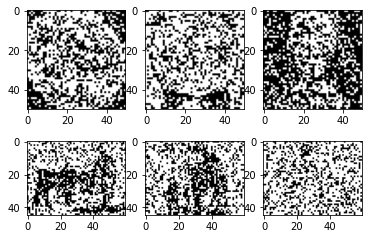

In [23]:
# define function to add noise from discrete uniform distribution to the image
def noisy(pixels, image):
    n = image.size
    img = image.flatten()
    for _ in range(pixels):
        i = np.random.randint(0, n)
        img[i] = -img[i]
    return img.reshape(image.shape)
    
# Add noise to the image
noise = 1000
img1_noisy = noisy(noise, img1)
img2_noisy = noisy(noise, img2)
img3_noisy = noisy(noise, img3)
img4_noisy = noisy(noise, img4)
img5_noisy = noisy(noise, img5)
img6_noisy = noisy(noise, img6)

# show noisy images
plt.figure()
plt.subplot(231)
plt.imshow(img1_noisy, cmap='gray')
plt.subplot(232)
plt.imshow(img2_noisy, cmap='gray')
plt.subplot(233)
plt.imshow(img3_noisy, cmap='gray')
plt.subplot(234)
plt.imshow(img4_noisy, cmap='gray')
plt.subplot(235)
plt.imshow(img5_noisy, cmap='gray')
plt.subplot(236)
plt.imshow(img6_noisy, cmap='gray')
plt.savefig('noisy_images.png')

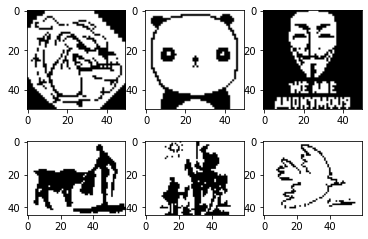

In [24]:
# clean noisy images
img1_clean = update(img1_noisy, w1)
img2_clean = update(img2_noisy, w1)
img3_clean = update(img3_noisy, w1)
img4_clean = update(img4_noisy, w2)
img5_clean = update(img5_noisy, w2)
img6_clean = update(img6_noisy, w2)


# show clean images
plt.figure()
plt.subplot(231)
plt.imshow(img1_clean, cmap='gray')
plt.subplot(232)
plt.imshow(img2_clean, cmap='gray')
plt.subplot(233)
plt.imshow(img3_clean, cmap='gray')
plt.subplot(234)
plt.imshow(img4_clean, cmap='gray')
plt.subplot(235)
plt.imshow(img5_clean, cmap='gray')
plt.subplot(236)
plt.imshow(img6_clean, cmap='gray')
plt.savefig('clean_images.png')

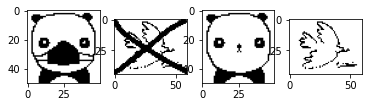

In [25]:
img2_altered = load_image('panda_con_barbijo.bmp')
img6_altered = load_image('paloma_X_agregada.bmp')

plt.figure()
plt.subplot(141)
plt.imshow(img2_altered, cmap='gray')
plt.subplot(142)
plt.imshow(img6_altered, cmap='gray')
plt.subplot(143)
plt.imshow(update(img2_altered, w1), cmap='gray')
plt.subplot(144)
plt.imshow(update(img6_altered, w2), cmap='gray')
plt.savefig('altered_images.png')

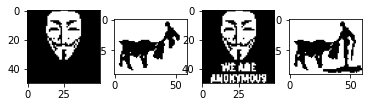

In [26]:
img3_altered = load_image('v_sin_nombre.bmp')
img4_altered = load_image('torero_sin_piernas.bmp')

plt.figure()
plt.subplot(141)
plt.imshow(img3_altered, cmap='gray')
plt.subplot(142)
plt.imshow(img4_altered, cmap='gray')
plt.subplot(143)
plt.imshow(update(img3_altered, w1), cmap='gray')
plt.subplot(144)
plt.imshow(update(img4_altered, w2), cmap='gray')
plt.savefig('Imagenes_sin_elem.png', format='png')

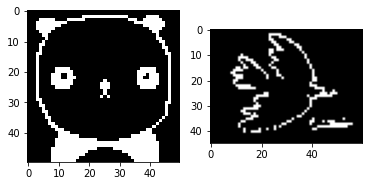

In [27]:
panda_inv = -img2
paloma_inv = -img6
plt.figure()
plt.subplot(121)
plt.imshow(panda_inv, cmap='gray')
plt.subplot(122)
plt.imshow(paloma_inv, cmap='gray')
plt.savefig('Imagenes_invertidas.png', format='png')

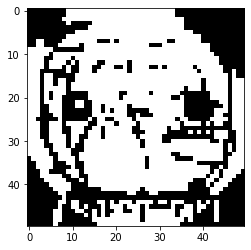

In [28]:
img_combinada = img1 + img2 + img3
img_combinada = signo(img_combinada)

plt.figure()
plt.imshow(img_combinada, cmap='gray')
plt.savefig('Imagenes_combinadas.png', format='png')


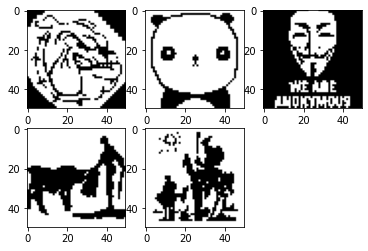

In [41]:
# padding images to 50x60
img4_crop = img4[:, 5:55]
img4_crop = np.pad(img4_crop, ((2, 3), (0, 0)), 'constant', constant_values=1)

img5_crop = img5[:, 5:55]
img5_crop = np.pad(img5_crop, ((2, 3), (0, 0)), 'constant', constant_values=1)

img6_crop = img6[:, 5:55]
img6_crop = np.pad(img6_crop, ((2, 3), (0, 0)), 'constant', constant_values=1)

# trainig network with cropped images
w3 = np.outer(img1, img1) + np.outer(img2, img2) + np.outer(img3, img3) + np.outer(img4_crop, img4_crop) + np.outer(img5_crop, img5_crop)
np.fill_diagonal(w3, 0)

# showing images learned
plt.figure()
plt.subplot(231)
plt.imshow(update(img1, w3), cmap='gray')
plt.subplot(232)
plt.imshow(update(img2, w3), cmap='gray')
plt.subplot(233)
plt.imshow(update(img3, w3), cmap='gray')
plt.subplot(234)
plt.imshow(update(img4_crop, w3), cmap='gray')
plt.subplot(235)
plt.imshow(update(img5_crop, w3), cmap='gray')
#plt.subplot(236)
#plt.imshow(update(img6_crop, w3), cmap='gray')
plt.savefig('5_Imagenes_aprendidas.png', format='png')